In [238]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tkinter as tk
from PIL import ImageDraw, Image
import io

In [239]:
mnist = tf.keras.datasets.mnist

In [240]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [241]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


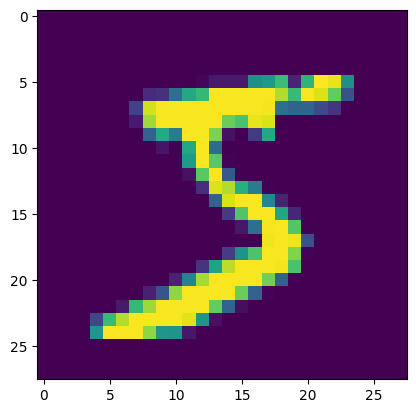

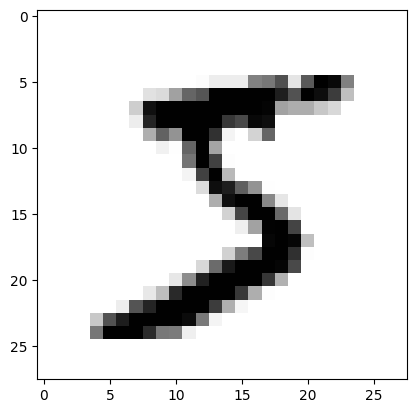

In [242]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [243]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

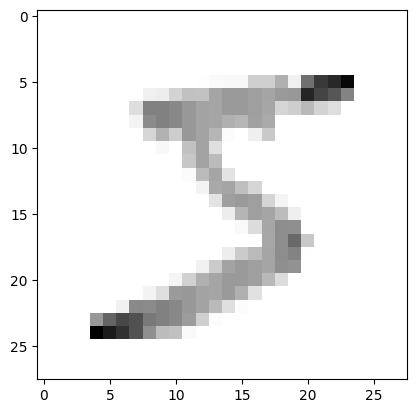

In [244]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [245]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [246]:
print(y_train[0])

5


In [247]:
IMG_SIZE = 28
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension: ", X_train.shape)
print("Testing Samples dimension: ", X_test.shape)

Training Samples dimension:  (60000, 28, 28, 1)
Testing Samples dimension:  (10000, 28, 28, 1)


In [ ]:
model = Sequential()

# First Convolution Layer 
model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:])) # only for first convolution layer to mention input layer size
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Fully connnected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

# Last Fully Connected Layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [249]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_42 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_43 (Activation)      │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_44 (Activation)      │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_45 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_46 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_47 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [250]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [251]:
model.fit(X_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.9048 - loss: 0.3084 - val_accuracy: 0.9604 - val_loss: 0.1234
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.9685 - loss: 0.1012 - val_accuracy: 0.9751 - val_loss: 0.0851
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.9780 - loss: 0.0728 - val_accuracy: 0.9764 - val_loss: 0.0740
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.9823 - loss: 0.0566 - val_accuracy: 0.9781 - val_loss: 0.0715
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.9856 - loss: 0.0443 - val_accuracy: 0.9801 - val_loss: 0.0704


In [252]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9818 - loss: 0.0634


In [253]:
print("Test Loss on 10000 test samples: ", test_loss)
print("Validation Accuracy on 10000 test samples: ", test_acc)

Test Loss on 10000 test samples:  0.0634082481265068
Validation Accuracy on 10000 test samples:  0.9818000197410583


In [254]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [255]:
print(predictions)

[[1.09881721e-08 4.80053700e-07 4.23654768e-07 ... 9.99998093e-01
  5.93784621e-09 8.39163704e-07]
 [1.52624771e-03 5.77412152e-07 9.98464227e-01 ... 3.27537077e-06
  2.00049044e-07 1.98661678e-06]
 [2.22578528e-05 9.99962330e-01 1.07473920e-06 ... 2.63433617e-06
  4.50727521e-06 1.67201063e-06]
 ...
 [3.29090621e-09 1.14762152e-07 3.95424316e-09 ... 9.99191556e-08
  1.16649126e-07 1.70440744e-05]
 [3.10859969e-06 7.25754873e-12 4.38632811e-12 ... 5.37698683e-13
  1.07387712e-06 1.73089258e-08]
 [3.64864391e-05 4.03133971e-10 7.89070143e-08 ... 2.96567393e-12
  2.25274434e-07 8.32497875e-08]]


In [268]:
image = Image.new("L", (280, 280), "black")
draw_img = ImageDraw.Draw(image)

In [269]:
def predict_digit(img):
    img = img.resize((28, 28))
    img = np.array(img)
    img = tf.keras.utils.normalize(img, axis=1)
    img = img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    res = model.predict(img)
    return np.argmax(res), float(np.max(res))


In [270]:
def classify_handwriting():
    digit, acc = predict_digit(image)
    label.config(text=f"Prediction: {digit}, Confidence: {acc:.2f}")

In [271]:
def draw(event):
    x, y = event.x, event.y
    r = 8
    canvas.create_oval(x-r, y-r, x+r, y+r, fill="white", outline="white")
    draw_img.ellipse((x-r, y-r, x+r, y+r), fill="white")

In [272]:
def clear_canvas():
    canvas.delete("all")
    global image, draw_img
    image = Image.new("L", (280, 280), "black")
    draw_img = ImageDraw.Draw(image)

In [273]:
root = tk.Tk()
root.title("Digit Recognizer")

canvas = tk.Canvas(root, width=280, height=280, bg="black")
canvas.grid(row=0, column=0, pady=2, sticky=tk.W, columnspan=2)
canvas.bind("<B1-Motion>", draw)

btn_predict = tk.Button(root, text="Predict", command=classify_handwriting)
btn_predict.grid(row=1, column=0, pady=2)

btn_clear = tk.Button(root, text="Delete", command=clear_canvas)
btn_clear.grid(row=1, column=1, pady=2)

label = tk.Label(root, text="Prediction: ", font=("Helvetica", 16))
label.grid(row=2, column=0, columnspan=2, pady=2)

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
